# Lab 1: Hypothesis testing and bootstrapping with SWE and ENSO data

#### Megan Thompson-Munson

In [49]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import xarray as xr

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

## Read in and plot data

In [2]:
# Read in global annual mean surface temperature data from CESM Large Ensemble Project

# Open both datasets
ds = xr.open_dataset('TS_timeseries_cesmle_1920_2100.nc')
ds1850 = xr.open_dataset('TS_timeseries_cesmle_1850.nc')

# Global surface temperature
gTS = ds['gts_ann_allcesmle']
gTS1850 = ds1850['gts_annual']

# Time variable
year = ds['year']

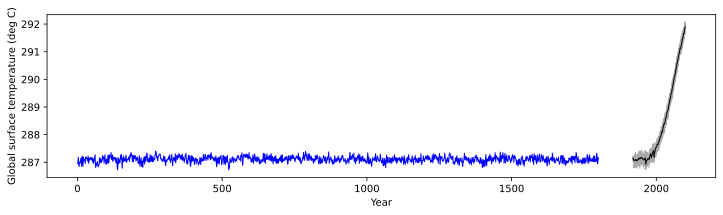

In [3]:
# Set up figure parameters
fig, ax = plt.subplots(1,figsize=(12,3))
ax.set_xlabel('Year')
ax.set_ylabel('Global surface temperature (deg C)')

# Plot 1850 data
ax.plot(gTS1850,'b',lw=1)

# Plot all ensemble members
for i in range(30):
    ax.plot(year,gTS[i],'darkgrey',lw=1)

# Plot mean of ensemble members
ax.plot(year,gTS.mean('member'),'k',lw=1)

# Question 1

### Population statistics

In [4]:
# Calculate mean and standard deviation
gTS1850mean = np.mean(gTS1850).values.item()
gTS1850std = np.std(gTS1850).values.item()

# Print statistics
print('1850 mean global surface temperature: {:.2f} K'.format(gTS1850mean))
print('1850 std. dev. of global surface temperature: {:.2f} K'.format(gTS1850std))

1850 mean global surface temperature: 287.11 K
1850 std. dev. of global surface temperature: 0.10 K


### Standardized statistics

In [5]:
# Standardize the data
std_gTS1850 = (gTS1850 - gTS1850mean) / gTS1850std

# Calculate statistics
std_gTS1850mean = np.mean(std_gTS1850).values.item()
std_gTS1850std = np.std(std_gTS1850).values.item()

# Print statistics
print('Standardized 1850 mean global surface temperature: {:.2f} K'.format(std_gTS1850mean))
print('Standardized 1850 std. dev. of global surface temperature: {:.2f} K'.format(std_gTS1850std))

Standardized 1850 mean global surface temperature: 0.00 K
Standardized 1850 std. dev. of global surface temperature: 1.00 K


<BarContainer object of 23 artists>

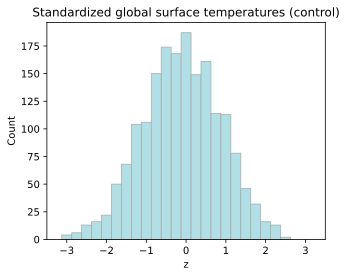

In [6]:
# Prepare figure
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_xlim((-3.5,3.5))
ax.set_ylabel('Count')
ax.set_xlabel('z')
ax.set_title('Standardized global surface temperatures (control)')

# Prepare data
xinc = np.arange(-3,3,0.25)
hx = np.histogram(std_gTS1850,xinc)

# Plot data
ax.bar(hx[1][:-1], hx[0], color='powderblue', edgecolor='darkgrey', lw=0.75, width=0.25)

Yes, this is a Gaussian distribution. The mean is 0 and standard deviation is 1.

## Question 2

In [32]:
# Choose a period
startYear = 1920
endYear = 1960
nYears = endYear-startYear

# Extract desired member for chosen period
gTSmem1 = gTS.sel(member=1).values[(year>=startYear)&(year<endYear)]

# Standardize and calculate statistics
std_gTSmem1 = (gTSmem1 - gTS1850mean) / gTS1850std
std_gTSmem1mean = np.mean(std_gTSmem1)
std_gTSmem1std = np.std(std_gTSmem1)

# Print statistics
print('Standardized EM 1 mean global surface temperature: {:.2f} K'.format(std_gTSmem1mean))
print('Standardized EM 1 std. dev. of global surface temperature: {:.2f} K'.format(std_gTSmem1std))

Standardized EM 1 mean global surface temperature: 0.09 K
Standardized EM 1 std. dev. of global surface temperature: 0.94 K


<BarContainer object of 119 artists>

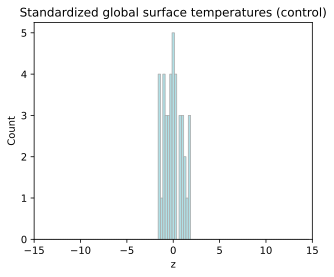

In [33]:
# Prepare figure
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_xlim((-15,15))
ax.set_ylabel('Count')
ax.set_xlabel('z')
ax.set_title('Standardized global surface temperatures (control)')

# Prepare data
xinc = np.arange(-15,15,0.25)
hx = np.histogram(std_gTSmem1,xinc)

# Plot data
ax.bar(hx[1][:-1], hx[0], color='powderblue', edgecolor='darkgrey', lw=0.75, width=0.25)

### Hypothesis testing: Test 1

1. $\alpha$ = 0.05 (95% confidence level)
2. $H_0$: The mean of the first ensemble member (1920-1960) is less than or equal to the mean of the control record. $H_1$: The mean of the first ensemble member is greater than the mean of the control record.
3. Assume a normal distribution. Use a z-test, since N > 30.
4. One-tailed z-test so |z| > z$_{0.05}$ (|z| > 1.645) to reject the null hypothesis.
5. See below.

In [38]:
# Choose a period
startYear = 1920
endYear = 1960
nYears = endYear-startYear

# Extract desired member for chosen period
gTSmem1 = gTS.sel(member=1).values[(year>=startYear)&(year<endYear)]

# Standardize and calculate statistics
std_gTSmem1 = (gTSmem1 - gTS1850mean) / gTS1850std
std_gTSmem1mean = np.mean(std_gTSmem1)
std_gTSmem1std = np.std(std_gTSmem1)

# Print statistics
print('Standardized EM 1 mean global surface temperature: {:.2f} K'.format(std_gTSmem1mean))
print('Standardized EM 1 std. dev. of global surface temperature: {:.2f} K'.format(std_gTSmem1std))

Standardized EM 1 mean global surface temperature: 0.09 K
Standardized EM 1 std. dev. of global surface temperature: 0.94 K


In [39]:
# Calculate probability using the z-statistic
sample_mean=np.mean(std_gTSmem1)
print('Sample mean: {:.2f} K'.format(sample_mean))
population_mean = std_gTS1850mean
population_std = std_gTS1850std
xstd = population_std/np.sqrt(nYears)
z = (sample_mean-population_mean)/xstd
probability = (1-stats.norm.cdf(z))*100
print('z-statistic: {:.2f}'.format(z))
print('Probability (percent): {:.2f}%'.format(probability))

Sample mean: 0.09 K
z-statistic: 0.58
Probability (percent): 28.03%


The calculated z-statistic is less that the critical z, so we cannot reject the null hypothesis.

### Hypothesis testing: Testing 2

1. $\alpha$ = 0.05 (95% confidence level)
2. $H_0$: The mean of the first ensemble member (2000-2020) is less than or equal to the mean of the control record. $H_1$: The mean of the first ensemble member is greater than the mean of the control record.
3. Assume a normal distribution. Use a t-test, since N < 30.
4. One-tailed t-test so |t| > t$_{0.05}$ (|t| > 1.729) to reject the null hypothesis.
5. See below.

In [40]:
# Choose a period
startYear = 2000
endYear = 2020
nYears = endYear-startYear

# Extract desired member for chosen period
gTSmem1 = gTS.sel(member=1).values[(year>=startYear)&(year<endYear)]

# Standardize and calculate statistics
std_gTSmem1 = (gTSmem1 - gTS1850mean) / gTS1850std
std_gTSmem1mean = np.mean(std_gTSmem1)
std_gTSmem1std = np.std(std_gTSmem1)

# Print statistics
print('Standardized EM 1 mean global surface temperature: {:.2f} K'.format(std_gTSmem1mean))
print('Standardized EM 1 std. dev. of global surface temperature: {:.2f} K'.format(std_gTSmem1std))

Standardized EM 1 mean global surface temperature: 6.81 K
Standardized EM 1 std. dev. of global surface temperature: 2.22 K


In [41]:
# Calculate probability using the z-statistic
sample_mean=np.mean(std_gTSmem1)
print('Sample mean: {:.2f} K'.format(sample_mean))
population_mean = std_gTS1850mean
population_std = std_gTS1850std
xstd = population_std/np.sqrt(nYears)
z = (sample_mean-population_mean)/xstd
probability = (1-stats.norm.cdf(z))*100
print('t-statistic: {:.2f}'.format(z))
print('Probability (percent): {:.2f}%'.format(probability))

Sample mean: 6.81 K
t-statistic: 30.44
Probability (percent): 0.00%


The calculated t is much greater than the critical t, so we can reject the null hypothesis.

***

## Question 3

Confidence intervals calculated with z and t are very similar.

A normal distribution is a good approximation for this.

In [43]:
### LEARNING GOAL #3 - Calculate confidence intervals on CESM-LE global warming using z-statistic and t-statistic

### Use the code below to calculate how much global warming occurred over the 21st century in both 
### individual ensemble members and the ensemble mean.
gts = gTS
## Compare 21st century global warming: one member vs. ensemble mean
gw_mem1=gts.sel(member=1).sel(year=slice(2080,2100)).mean("year")- \
        gts.sel(member=1).sel(year=slice(2000,2020)).mean("year")
gw_mean=(gts.sel(year=slice(2080,2100)).mean("year").mean("member"))- \
        (gts.sel(year=slice(2000,2020)).mean("year").mean("member"))
print(np.round(gw_mem1.values,2))
print(np.round(gw_mean.values,2))

3.7
3.63


In [44]:
## Next - let's calculate emsemble statistics about 21st century global warming
nmembers=30
temp=(gts.sel(member=slice(1,nmembers)).sel(year=slice(2080,2100)).mean("year")-\
      gts.sel(member=slice(1,nmembers)).sel(year=slice(2000,2020)).mean("year"))
gw_mean_mem=temp.mean("member")
gw_std_mem=temp.std("member")
gw_min_mem=temp.min("member")
gw_max_mem=temp.max("member")
print("mean: ",str(np.round(gw_mean_mem.values,2)))
print("stdev: ",str(np.round(gw_std_mem.values,2)))
print("min: ",str(np.round(gw_min_mem.values,2)))
print("max: ",str(np.round(gw_max_mem.values,2)))

mean:  3.63
stdev:  0.06
min:  3.51
max:  3.75


In [45]:
### Let's add confidence intervals to the estimated global warming
### Specifically - we'll compare confidence intervals calculated using t-statistic and z-statistic

#### Calculate the 95% and 99% confidence limits on the 21st century warming using t-statistic
#### Assume that the global warming is normally distributed.
N=nmembers
df=N-1

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
tstat95=stats.t.ppf(0.975,df)
low_limit95=gw_mean_mem-tstat95*(gw_std_mem/np.sqrt(nmembers-1))
high_limit95=gw_mean_mem+tstat95*(gw_std_mem/np.sqrt(nmembers-1))
print("95% confidence limits - t-statistic")
print(np.round(low_limit95.values,2))
print(np.round(high_limit95.values,2))

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
tstat99=stats.t.ppf(0.995,df)
low_limit99=gw_mean_mem-tstat99*(gw_std_mem/np.sqrt(nmembers-1))
high_limit99=gw_mean_mem+tstat99*(gw_std_mem/np.sqrt(nmembers-1))
print("99% confidence limits - t-statistic")
print(np.round(low_limit99.values,2))
print(np.round(high_limit99.values,2))

#### Calculate the 95% and 99% confidence limits on the 21st century warming using z-statistic
#### Assume that the global warming is normally distributed.

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
zstat95=stats.norm.ppf(0.975)
low_limit95=gw_mean_mem-zstat95*(gw_std_mem/np.sqrt(nmembers))
high_limit95=gw_mean_mem+zstat95*(gw_std_mem/np.sqrt(nmembers))
print("95% confidence limits - z-statistic")
print(np.round(low_limit95.values,2))
print(np.round(high_limit95.values,2))

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
zstat99=stats.norm.ppf(0.995)
low_limit99=gw_mean_mem-zstat99*(gw_std_mem/np.sqrt(nmembers))
high_limit99=gw_mean_mem+zstat99*(gw_std_mem/np.sqrt(nmembers))
print("99% confidence limits - z-statistic")
print(np.round(low_limit99.values,2))
print(np.round(high_limit99.values,2))

95% confidence limits - t-statistic
3.61
3.66
99% confidence limits - t-statistic
3.6
3.67
95% confidence limits - z-statistic
3.61
3.66
99% confidence limits - z-statistic
3.6
3.66


[3.695221  3.636963  3.652832  3.6441956 3.634613  3.5675354 3.6606445
 3.7267761 3.5054932 3.6834412 3.5503845 3.5212708 3.5517578 3.6859741
 3.619995  3.7277527 3.6286316 3.541504  3.5733337 3.5706787 3.6762085
 3.6142273 3.6184998 3.6961365 3.6150513 3.6669922 3.6224976 3.688324
 3.7549744 3.6689758]
[3.5  3.55 3.6  3.65 3.7  3.75]


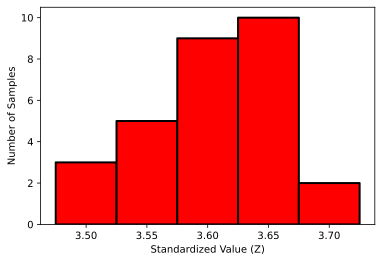

In [46]:
#### plot a histogram of global warming - Was normal distribution a good approximation?
gw_allmem=gts.sel(member=slice(1,nmembers)).sel(year=slice(2080,2100)).mean("year")- \
        gts.sel(member=slice(1,nmembers)).sel(year=slice(2000,2020)).mean("year")
print(gw_allmem.values)

## plot a histogram to see the range of values
xinc = np.arange(3.5,3.8,.05)
print(xinc)
hx=np.histogram(gw_allmem,xinc)
plt.bar(hx[1][:-1],hx[0],edgecolor = 'k', color = 'r', width = .05, linewidth = 2);
plt.ylabel('Number of Samples');
plt.xlabel('Standardized Value (Z)');

### another histogram option
#xinc = np.arange(3.5,3.8,.05)
#plt.hist(gw_allmem,xinc);
#plt.ylabel('Number of Samples');
#plt.xlabel('Standardized Value (Z)');

In [47]:
#### What if you you only had 6 ensemble members?  Estimate your confidence interval using a t-statistic.
## Calculate statistics for the 21st century global warming
nmembers=6
temp=(gts.sel(member=slice(1,nmembers)).sel(year=slice(2080,2100)).mean("year")-\
      gts.sel(member=slice(1,nmembers)).sel(year=slice(2000,2020)).mean("year"))
print(temp)
gw_mean_mem=temp.mean("member")
gw_std_mem=temp.std("member")
gw_min_mem=temp.min("member")
gw_max_mem=temp.max("member")

print("mean: ",str(np.round(gw_mean_mem.values,2)))
print("stdev: ",str(np.round(gw_std_mem.values,2)))
print("min: ",str(np.round(gw_min_mem.values,2)))
print("max: ",str(np.round(gw_max_mem.values,2)))

<xarray.DataArray 'gts_ann_allcesmle' (member: 6)>
array([3.695221 , 3.636963 , 3.652832 , 3.6441956, 3.634613 , 3.5675354],
      dtype=float32)
Coordinates:
  * member   (member) int32 1 2 3 4 5 6
mean:  3.64
stdev:  0.04
min:  3.57
max:  3.7


In [48]:
#### Calculate the 95% and 99% confidence limits on the 21st century warming using t-statistic
#### Assume that the global warming is normally distributed.  (See page 18 of Barnes notes)
N=nmembers
df=N-1

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
tstat95=stats.t.ppf(0.975,df)
low_limit95=gw_mean_mem-tstat95*(gw_std_mem/np.sqrt(nmembers-1))
high_limit95=gw_mean_mem+tstat95*(gw_std_mem/np.sqrt(nmembers-1))
print("95% confidence limits - t-statistic")
print(low_limit95.values)
print(high_limit95.values)

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
tstat99=stats.t.ppf(0.995,df)  #### FIXED - this said stats.norm.ppf instead of stats.t.ppf
low_limit99=gw_mean_mem-tstat99*(gw_std_mem/np.sqrt(nmembers-1))
high_limit99=gw_mean_mem+tstat99*(gw_std_mem/np.sqrt(nmembers-1))
print("99% confidence limits - t-statistic")
print(low_limit99.values)
print(high_limit99.values)

95% confidence limits - t-statistic
3.5952689933866235
3.681851119986179
99% confidence limits - t-statistic
3.5706549020445166
3.706465211328286
